리뷰데이터 컬럼  
sitename	: ex) 옥션,쿠팡  
idx	  
title : 해당 상품평의 판매 제품 타이틀	  
url  : 판매 제품 URL	  
brand : 판매 제품 브랜드	  
price_final : 판매 가격	  
cmt_writedate : (댓글) 작성일자	  
cmt_content : (댓글) 상품평 (제목/본문)	  
cmt_rating : (댓글) 별점	  
cmt_itemname : (댓글) 구매 상품  

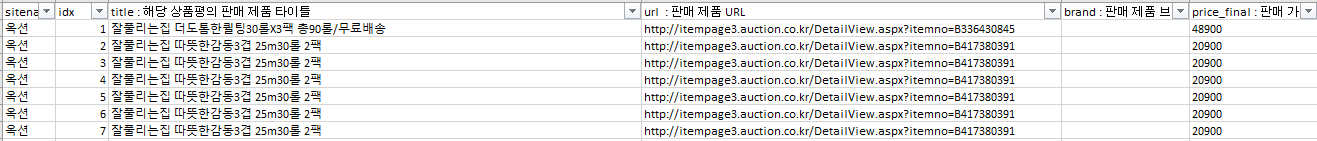

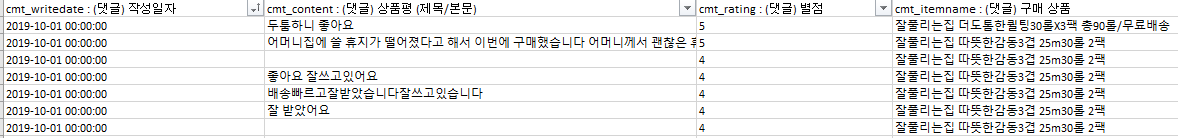

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import  expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

In [2]:
# headless 설정 
from selenium.webdriver.chrome.options import Options 
chrome_options = Options()
chrome_options.headless = True

#Pageload Strategy 설정 변경3
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities 
caps = DesiredCapabilities().CHROME 
caps["pageLoadStrategy"] = "none" 
# 원래 default는 caps["pageLoadStrategy"] = "normal"

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller
import subprocess
import shutil

try:
    shutil.rmtree(r"c:\chrometemp")  #쿠키 / 캐쉬파일 삭제
except FileNotFoundError:
    pass

subprocess.Popen(r'C:\Program Files\Google\Chrome\Application\chrome.exe --remote-debugging-port=9222 --user-data-dir="C:\chrometemp"') # 디버거 크롬 구동
#subprocess.Popen(r'C:\Program Files (x86)\Google\Chrome\Application\chrome.exe --remote-debugging-port=9222 --user-data-dir="C:\chrometemp"') # 디버거 크롬 구동



option = Options()
option.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
try:
    browser = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe', options=option)
except:
    chromedriver_autoinstaller.install(True)
    browser = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe', options=option)
browser.implicitly_wait(10)

C:\Users\USER\AppData\Local\Temp/ipykernel_12172/3958099618.py:22: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe', options=option)


In [4]:
url = "https://www.coupang.com/vp/products/5843696916?itemId=10148814133&vendorItemId=77431524261&sourceType=srp_product_ads&clickEventId=dd92df3e-b436-46ef-83ef-f68a2ff06c57&korePlacement=15&koreSubPlacement=9&q=%EC%A7%80%EA%B0%91&itemsCount=36&searchId=4c6aaee3b06c4691b50d88b6e36216d5&rank=8&isAddedCart="
browser.get(url)
time.sleep(10)
#body = browser.find_element_by_tag_name('body')
# for i in range(5):
#     time.sleep(0.2)
#     body.send_keys(Keys.PAGE_DOWN)
    
wait = WebDriverWait(browser,30)
coupang_product_result = pd.DataFrame(columns={"score", "date","comment"})
now_page = 1
review_button = browser.find_element(By.CSS_SELECTOR,'#prod-review-nav-link > span.count')
print(review_button.text)
review_button.click()
time.sleep(15)# browser.implicitly_wait(60)


import time
start = time.time()  # 시작 시간 저장
print('start')
a =0
#while True:
for i in range(10000000000):
    a +=1
    
    #wait.until(EC.presence_of_element_located((By.CLASS_NAME, "js_reviewArticleListContainer")))
    #wait.until(EC.presence_of_element_located((By.CLASS_NAME, "sdp-review__article__list.js_reviewArticleReviewList")))

    review_area = browser.find_element(By.CLASS_NAME,'js_reviewArticleListContainer')
    review_list = review_area.find_elements(By.CLASS_NAME,'sdp-review__article__list.js_reviewArticleReviewList')
    
    #print(a)
    #print('*'*10)

    for review in review_list:
        list_info = review.find_element(By.CLASS_NAME,'sdp-review__article__list__info')
        product_info = list_info.find_element(By.CLASS_NAME,'sdp-review__article__list__info__product-info')
        star_info = product_info.find_element(By.CLASS_NAME,'sdp-review__article__list__info__product-info__star-gray')
        star_data = star_info.find_element(By.CLASS_NAME,'sdp-review__article__list__info__product-info__star-orange.js_reviewArticleRatingValue')
        star = star_data.get_attribute('data-rating')
        date_info = review.find_element(By.CLASS_NAME,'sdp-review__article__list__info__product-info__reg-date')
        date = date_info.text


        head_data = ""#헤드데이터 없는 경우를 위해
        try:
            head_line = review.find_element(By.CLASS_NAME,'sdp-review__article__list__headline')
            head_data = head_line.text
        except:
                pass

        comment = head_data + " "

        try:
            comment_area = review.find_element(By.CLASS_NAME,'sdp-review__article__list__review.js_reviewArticleContentContainer')
            comment += comment_area.text
        except:
            pass

      
        if len(comment)==0 or comment.strip() == "":
            #print('\n ###BREAK### : en(comment)==0 or comment.strip()')
            break
        
        #print("\n")    
        #print(star,date,comment)    
            
        coupang_product_result = coupang_product_result.append(
            {'score':star, 'date':date, 'comment':comment}, ignore_index=True)
        
    try:
        page_button_area = review_area.find_element(By.CLASS_NAME,'sdp-review__article__page.js_reviewArticlePagingContainer')
    except:
        #print("\n ###BREAK### : page_button_area = review_area.find_element(By.CLASS_NAME,'sdp-review__article__page.js_reviewArticlePagingContainer')")
        break
    
    page_buttons = page_button_area.find_elements(By.CSS_SELECTOR,'button')
    last_page_num = int(page_buttons[-2].get_attribute('data-page'))

    if(last_page_num==now_page):
        last_button = page_buttons[-1].is_enabled()
        if(last_button == False):
            #print('\n ###BREAK### : if(last_button == False):')
            break
        else:
            now_page += 1
            next_page_button = page_buttons[-1]
            webdriver.ActionChains(browser).move_to_element(next_page_button).click(next_page_button).perform()
            time.sleep(2)
    else:

        now_page += 1
        next_page = now_page % 10 #페이지수 넘기기 위해 나누기한 값
        if next_page == 0:
            next_page = 10

        next_page_button = page_buttons[next_page]

        staleElement = True

        webdriver.ActionChains(browser).move_to_element(next_page_button).click(next_page_button).perform()
        time.sleep(2)
        


browser.close()
print("time(분) :", (time.time() - start)/60)  # 현재시각 - 시작시간 = 실행 시간
print('End')
#386.44508719444275
#6.477

85개 상품평
start
time(분) : 7.617174609502157
End


In [5]:
coupang_product_result

,date,comment,score
0,2022.03.16,"추천합니다. 신분증, 카드들을 넣을 수 있는 공간이 많은 지갑을 찾다 구매하였는데\...",5
1,2022.03.11,매우 만족! 가성비 최고! 너무 마음에 듭니다. 크기도 적당하고 디자인도 좋구요.\...,5
2,2022.03.16,"가볍게 갖고 다닐 수 있는 지갑을 찾으신다면 추천합니다 소재도 부드럽고 신분증, 각...",5
3,2022.03.16,튼튼하고 세련되고 수납 넉넉해요.\n완전 꿀 이네요.\n가죽 퀄리티도 화면보다 좋...,5
4,2022.03.16,동전이나 지폐보다 카드보관을 원하시는분들께 추천드립니다 상세페이지를 보면서 생각했던...,5
5,2022.03.12,깔끔하고 기본적인 기능에 충실한 지갑 카드를 많이 넣을 수 있고 동전 수납도 가능한...,4
6,2022.03.12,^^ 급하게 카드지갑이 필요해서 구매했어요\n역시 급히 필요할땐 쿠팡!\n\n솔직히...,5
7,2022.03.18,로켓배송으로카드지갑 검색하다가 발견했어요\n저렴한가격에 레드와인색상까지 맘에 들어...,5
8,2022.03.16,만족스러운 제품이었습니다 한 번 산 지갑은 낡고 해질때까지 쓰는 편이라 후기 좋고 ...,5
9,2022.03.17,지갑은 레드! 어머니가 자주 안 쓰시는 카드끼리 정리가 필요하다고 하셔서 구매.\n...,5


In [6]:
#excel 변환
coupang_product_result.to_csv("상품 리뷰데이터 크롤링_Sample_220504.csv",index=False,encoding='utf-8-sig')